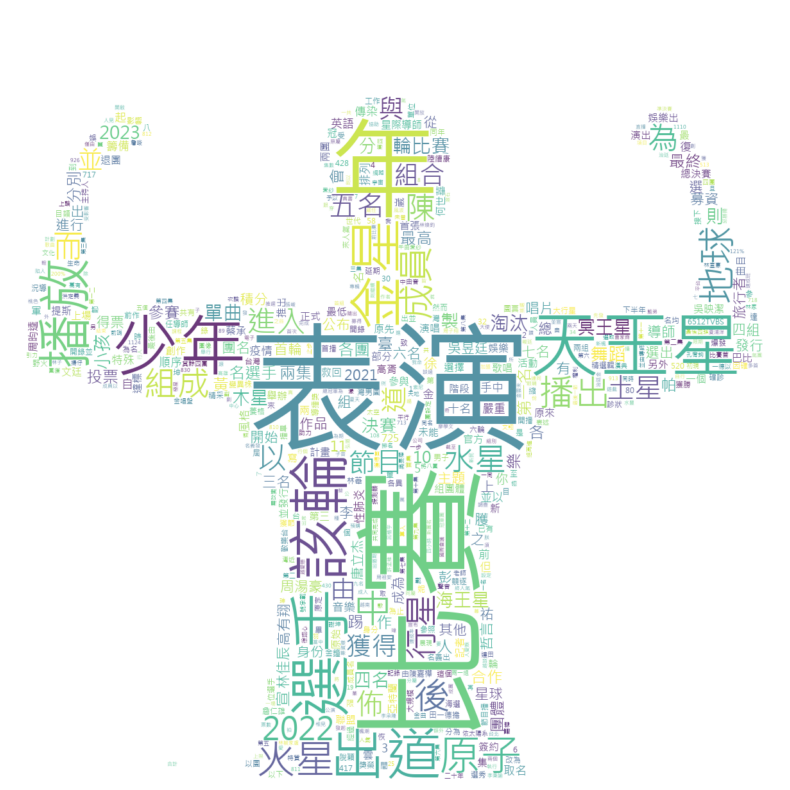

In [14]:
!pip install jieba
!pip install wordcloud
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import jieba
from collections import Counter
from wordcloud import WordCloud
from PIL import Image

# 獲取數據目錄
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# 網頁內容
url = "https://zh.wikipedia.org/zh-tw/%E5%8E%9F%E5%AD%90%E5%B0%91%E5%B9%B4"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}
res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, "html.parser")

# 抓取內容
contents = soup.find_all("p")
text = "\n".join([content.get_text() for content in contents])

# 清理文本
substitutions = {r'的|和|在|日|月|對|或|等|他們|可以|於|及|\s+': '', r'\b(?:[A-Za-z0-9]+)\b': ''}
for pattern, replacement in substitutions.items():
    text = re.sub(pattern, replacement, text)

# 讀取遮罩圖像
man_mask = np.array(Image.open(path.join(d, "man.jpeg")))

# 使用自定義的停用詞列表
stop_words = set(["的", "和", "在", "日", "月", "對", "或", "等", "他們", "可以", "於", "及"])
filtered_words = [word for word in jieba.cut(text, cut_all=False) if word not in stop_words and re.match('[\u4e00-\u9fa50-9]+', word)]

# 統計詞頻
word_freq = Counter(filtered_words)

# 生成文字雲
font_path = "c:\Windows\Fonts\msjh.ttc"
wc = WordCloud(
    font_path=font_path,
    background_color="white",
    mask=man_mask,  # 使用男人背景的遮罩圖像
    max_words=1000,  # 設定最大顯示單詞數量，減少文字數量
    width=1200,  # 設定文字雲的寬度，增加寬度
    height=900  # 設定文字雲的高度，增加高度
)

wordcloud = wc.generate_from_frequencies(word_freq)

# 顯示文字雲
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear", cmap=plt.cm.gray, alpha=0.8)  # 調整顏色和透明度
plt.axis("off")
plt.show()


In [13]:
import requests
from bs4 import BeautifulSoup
import jieba
from collections import Counter

# 指定目標網站的 URL
url = "https://zh.wikipedia.org/zh-tw/%E5%8E%9F%E5%AD%90%E5%B0%91%E5%B9%B4"

# 發送 HTTP 請求並取得網頁內容
response = requests.get(url)
html_content = response.text

# 使用 BeautifulSoup 解析 HTML
soup = BeautifulSoup(html_content, "html.parser")

# 提取文本內容
text_content = " ".join([p.text for p in soup.find_all("p")])

# 移除非中文字符
chinese_text = "".join(char for char in text_content if "\u4e00" <= char <= "\u9fff")

# 切詞
words = [word for word in jieba.cut(chinese_text) if len(word) > 1]  # 這裡使用 jieba 分詞

# 計算詞頻
word_freq = Counter(words)

# 計算詞頻，按照出現次數由多到少排列
sorted_word_freq = word_freq.most_common()

# 輸出結果
for word, freq in sorted_word_freq:
    print(f"{word}: {freq} 次")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Claire\AppData\Local\Temp\jieba.cache
Loading model cost 0.873 seconds.
Prefix dict has been built successfully.


比賽: 21 次
表演: 20 次
出道: 17 次
天王星: 15 次
少年: 14 次
選手: 14 次
播放: 12 次
金星: 12 次
原子: 11 次
地球: 10 次
火星: 10 次
播出: 9 次
行星: 9 次
該輪: 9 次
年月日: 8 次
成員: 8 次
水星: 8 次
進入: 8 次
組成: 8 次
五名: 7 次
土星: 7 次
獲得: 6 次
輪比賽: 6 次
淘汰: 6 次
節目: 5 次
組合: 5 次
舞蹈: 5 次
木星: 5 次
海王星: 5 次
四名: 5 次
冥王星: 5 次
決賽: 5 次
小孩: 5 次
參賽: 4 次
各團: 4 次
兩集: 4 次
以及: 4 次
分別: 4 次
合作: 4 次
第一名: 4 次
投票: 4 次
最高: 4 次
單曲: 4 次
進行: 3 次
選出: 3 次
開始: 3 次
公布: 3 次
人氣: 3 次
團體: 3 次
最終: 3 次
首輪: 3 次
主題: 3 次
三名: 3 次
旅行者: 3 次
唱片: 3 次
四組: 3 次
導師: 3 次
星球: 3 次
其他: 3 次
成為: 3 次
名選手: 3 次
積分: 3 次
七名: 3 次
得票: 3 次
發行: 3 次
作品: 3 次
林佳辰: 3 次
哲言: 3 次
娛樂: 3 次
六名: 3 次
有翔: 3 次
吳昱廷: 3 次
唐立杰: 3 次
身份: 3 次
籌備: 2 次
風格: 2 次
音樂: 2 次
嚴重: 2 次
特殊: 2 次
傳染: 2 次
性肺炎: 2 次
疫情: 2 次
並以: 2 次
排列: 2 次
順序: 2 次
十名: 2 次
手中: 2 次
團的: 2 次
設定: 2 次
取名: 2 次
周湯豪: 2 次
吳映: 2 次
上場: 2 次
選擇: 2 次
最低: 2 次
第三: 2 次
聯盟: 2 次
兩團: 2 次
一個: 2 次
歌唱: 2 次
救回: 2 次
另外: 2 次
總決賽: 2 次
未能: 2 次
原來: 2 次
演出: 2 次
原先: 2 次
組團體: 2 次
正式: 2 次
階段: 2 次
文廷: 2 次
記者: 2 次
官方: 2 次
演唱: 2 次
並發行: 2 次
舉辦: 2 次
推出: 2 次
募資: 2 次
計畫: 2 次
巴比: 2 次
高胥: 2 次
蔡承: 2